# Computational Statistics, Graded Assignment 2

## Importing packages and data

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import pearsonr
from scipy.special import comb

In [51]:
df = pd.read_csv("law.csv")
df.head()

,LSAT,GPA
0,576,3.39
1,635,3.30
2,558,2.81
3,578,3.03
4,666,3.44


## Light Data Exploration

In [52]:
lsat = df['LSAT']
gpa = df['GPA']

In [53]:
print(gpa)

0     3.39
1     3.30
2     2.81
3     3.03
4     3.44
5     3.07
6     3.00
7     3.43
8     3.36
9     3.13
10    3.12
11    2.74
12    2.76
13    2.88
14    2.96
Name: GPA, dtype: float64


In [54]:
#I calculated the Pearsos's coef
r_observed, _ = pearsonr(lsat, gpa)
print('Observed correlation coefficient:', r_observed)

Observed correlation coefficient: 0.776374491289407


## Bootstrapping

In [55]:
#B = 40000 bootstrap resamples
B = 40000
r_bootstrap = np.zeros(B)
for i in range(B):
    indices = np.random.choice(len(df), size=len(df), replace=True)
    lsat_resample = lsat[indices]
    gpa_resample = gpa[indices]
    r_bootstrap[i], _ = pearsonr(lsat_resample, gpa_resample)

In [56]:
print(r_bootstrap)

[0.81524889 0.65047999 0.64554905 ... 0.7932129  0.68864192 0.61479506]


### Data Exploration on Bootstrap

In [57]:
#mean and standard deviation of the B
r_mean = np.mean(r_bootstrap)
r_std = np.std(r_bootstrap)
print('Bootstrap mean:', r_mean)
print('Bootstrap standard deviation:', r_std)

Bootstrap mean: 0.7718685188096702
Bootstrap standard deviation: 0.13282448967473284


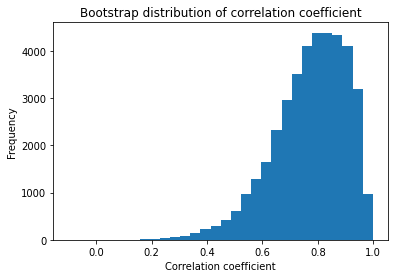

In [58]:
plt.hist(r_bootstrap, bins=30)
plt.xlabel('Correlation coefficient')
plt.ylabel('Frequency')
plt.title('Bootstrap distribution of correlation coefficient')
plt.show()

We can see from here that the shape of the histogram indicate a positively corelation (is stronger for the high values than for the low values)

In [62]:
# Compute the length of LSAT
n = len(df.LSAT)

# Define the number of possible compositions
total = comb(2 * n - 1, n - 1, exact=True)

gray_codes = np.zeros((total, n), dtype=int)
# N-W algorithm to run through compositions Cn
# This is where the gray codes will be stored temporarily
k = [0] * n
k[0] = n
t = n
h = 0
i = 0

gray_codes[i, :] = k.copy()
i += 1

while k[n - 1] != n:
    if k[i] != 0:
        h = 0
    h += 1
    t = k[h - 1]
    k[h - 1] = 0
    k[i] = t - 1
    k[h] += 1
    gray_codes[i, :] = k.copy()
    i += 1